# Welcome to the Composite Materials Playground

## Here you can create your own composite materials and predict their properties. 

We will go through creating materials classes for composite materials with two components and composite materials with three components.

![title](img/composite.png)

# Class Builder
## Define the classes for creating composite material objects with 2 materials and 3 materials

The below cell contains classes for materials with two and three components

In [78]:
class Composites_Builder_2:
    def __init__(material, DensityP1, DensityP2, Mass_FractionP1 , Mass_FractionP2, TensStrengthP1, TensStrengthP2 ):
        material.DensityP1 = DensityP1
        material.DensityP2 = DensityP2
        material.Mass_FractionP1 = Mass_FractionP1
        material.Mass_FractionP2 = Mass_FractionP2
        material.YoungsModulusP1 = YoungsModulusP1
        material.YoungsModulusP2 = YoungsModulusP2 
        material.TensStrengthP1 = TensStrengthP1
        material.TensStrengthP2 = TensStrengthP2 
        
class Composites_Builder_3:
    def __init__(material, DensityP1, DensityP2, DensityP3, Mass_FractionP1 , Mass_FractionP2, 
                 Mass_FractionP3, TensStrengthP1, TensStrengthP2, TensStrengthP3 ):
        material.DensityP1 = DensityP1
        material.DensityP2 = DensityP2
        material.DensityP3 = DensityP3
        material.Mass_FractionP1 = Mass_FractionP1
        material.Mass_FractionP2 = Mass_FractionP2
        material.Mass_FractionP3 = Mass_FractionP3
        material.YoungsModulusP1 = YoungsModulusP1
        material.YoungsModulusP2 = YoungsModulusP2
        material.YoungsModulusP3 = YoungsModulusP3
        material.TensStrengthP1 = TensStrengthP1
        material.TensStrengthP2 = TensStrengthP2
        material.TensStrengthP3 = TensStrengthP3

# Materials Playground
Use below cells to play around with different configurations of materials

Change the values for thre respective properties below and see results

# Materials Creator: Two constituents 

In [42]:
material1 = Composites_Builder_2(1.0, 2.0, .30, .70, 10000, 20000)

material2 = Composites_Builder_2(3.0, 2.0, .45, .65, 12000, 34000)

material3 = Composites_Builder_2(2.3, 5.5, .90, .10, 25000, 12000)

# Materials Creator: Three constitutents

In [43]:
material4 = Composites_Builder_3(1,2,3,.10,.20,.70, 10000, 20000, 30000)

material5 = Composites_Builder_3(1,3,2.5, .30, .40, .30, 12000, 15400, 1200)

material6 = Composites_Builder_3(2, 1.3, 2.9, .15, .45,.40, 9800, 2000, 1310)

# Evaulate the Composite Properties

## Use function below

The function takes attributes from the class and calculates composite properties try it out!

In [44]:
def material_property_evaluator(*args):
    
    CompositeDensity = []
    CompositeTensileStrength = []
    
    for a in args:
        if hasattr(a, "DensityP3"):
            
            combinedDensity = a.DensityP1 * a.Mass_FractionP1 + a.DensityP2 * a.Mass_FractionP2 + a.DensityP3 * a.Mass_FractionP3
            CompositeDensity.append(combinedDensity)

            compositeStrength = a.TensStrengthP1 * a.Mass_FractionP1 + a.TensStrengthP2 * a.Mass_FractionP2 + a.TensStrengthP3 * a.Mass_FractionP3
            CompositeTensileStrength.append(compositeStrength)
        
        else:
            combinedDensity = a.DensityP1 * a.Mass_FractionP1 + a.DensityP2 * a.Mass_FractionP2 
            CompositeDensity.append(combinedDensity)

            compositeStrength = a.TensStrengthP1 * a.Mass_FractionP1 + a.TensStrengthP2 * a.Mass_FractionP2 
            CompositeTensileStrength.append(compositeStrength) 
            
        
    
    
    return CompositeDensity, CompositeTensileStrength

In [56]:
properties = material_property_evaluator(material1, material2, material4, material5)

# Make a Data Table for the Property Values

In [57]:
data = {'Density' : properties[0], "Tensile Strength (psi)" : properties[1]}

In [58]:
import pandas as pd

In [59]:
pd.DataFrame.from_dict(data)

,Density,Tensile Strength (psi)
0,1.70,17000.0
1,2.65,27500.0
2,2.60,26000.0
3,2.25,10120.0


# Property Manipulator

## Change one property and see how it affects whole composite

Sometimes we want to change one property while keeping others constant. 

Lets see how to do this below. 

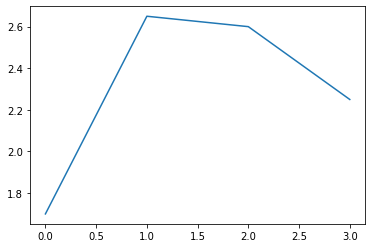

In [77]:
#FuncAnimation object of the animation package.
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

#ysample = random.sample(range(-50, 50), 100)


#xdata = []
#ydata = []

xdata = range(len(properties[0]))

ydata = properties[0]

plt.show()

plt.plot(xdata, ydata)


# add this if you don't want the window to disappear at the end 



#plt.show()

In [73]:
[len(properties[0])]

[4]

# Specially orthotropic composites

## Q and S matrices

 generate the matrices that can allow you to convert between principal stresses and strains. 

In [1]:
import numpy as np 
# function in progress
def S_matrix(E1, E2, G12, v12, v21):
    """ Generates an S (Compliance) matrix that converts material stresses to material strains"""
    
    S11 = 1/E1
    if v21 == 0:
        S12 = -v12/E1
    else:
        S12 = -v21/E2
    S22 = 1/E2
    S66 = 1/G12
    
    S = np.array([[S11, S12, 0],[S12, S22, 0],[0,0,S66]])
    
    return S
    
def Q_matrix(E1,E2, G12, v12, v21):
    """ Generates a Q (stiffness) matrix that converts material strains to material stresses """
    
    Q11 = E1/(1 - v12 * v21)
    Q22 = E2/(1-v12*v21)
    Q12 = (v12*E2)/(1-v12*v21)
    Q66 = G12
    
    Q = np.array([[Q11, Q12, 0], [Q12, Q22, 0],[0,0,Q66]])    
    
    return Q
   

In [4]:
print(S_matrix(1,1,1,1,1))

print(Q_matrix(1,1,1,1,0))

[[ 1. -1.  0.]
 [-1.  1.  0.]
 [ 0.  0.  1.]]
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 1.]]


# Generally orthotropic Plates

## Transformation matrices

For generally orthotropic lamina, since the load is placed at an angle other than 0 or 90 degrees, the stresses and strains have to transformed into coordinates that coincide with the material directions. Performing force balances provides 3 equations which can be represented in matrix form. The equation will be available below. 

In [18]:
import math

def T_matrix(theta):
    C = math.cos(theta * (180/math.pi))
    S = math.sin(theta * (180/math.pi))
    
    print(C)
    
    print(S)
    
    
    T = np.array([[C**2, S**2, 2 * S * C], [S**2, C**2, -2*S*C], [-S*C, S * C, C**2 - S**2]])
    
    return T 

T_matrix(25)

0.9852851019465001
-0.1709188927014062


array([[ 0.97078673,  0.02921327, -0.33680768],
       [ 0.02921327,  0.97078673,  0.33680768],
       [ 0.16840384, -0.16840384,  0.94157346]])

If you want to go in the other direction, that is to say you want to go from the material axes to the principal axes, use the inverse of the T matrix 

In [19]:
from numpy.linalg import inv

def T_Inverse(Matrix):
    
    X = inv(Matrix)
    
    return X

In [21]:
T_Inverse(T_matrix(25))

0.9852851019465001
-0.1709188927014062


array([[ 0.97078673,  0.02921327,  0.33680768],
       [ 0.02921327,  0.97078673, -0.33680768],
       [-0.16840384,  0.16840384,  0.94157346]])